# Convolutional Neural Network

### Importing the libraries

In [56]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [57]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import os

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [93]:
train_dir = 'dataset/training_set' 
test_dir = 'dataset/test_set'       

img_size = (64, 64)
#batch_size = 32
#epochs = 25
#learning_rate = 0.001

train_datagen = ImageDataGenerator(
    rescale=1./255,           
    shear_range=0.2,          
    zoom_range=0.2,        
    horizontal_flip=True      
)

training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2912 images belonging to 3 classes.


### Preprocessing the Test set

In [78]:
test_datagen = ImageDataGenerator(
    rescale=1./255     # Normalize pixel values without any augmentation
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2000 images belonging to 3 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [79]:
model = Sequential()

### Step 1 - Convolution

In [80]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))

### Step 2 - Pooling

In [81]:
model.add(MaxPooling2D(pool_size=(2, 2)))

### Adding a second convolutional layer

In [82]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

### Step 3 - Flattening

In [83]:
model.add(Flatten())

### Step 4 - Full Connection

In [84]:
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

### Step 5 - Output Layer

In [85]:
model.add(Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [86]:
learning_rate = 0.001
model.compile(
    optimizer=Adam(learning_rate=learning_rate),  # Adam optimizer with specified learning rate
    loss='binary_crossentropy',                  # Binary crossentropy loss for binary classification
    metrics=['accuracy']                         # Track accuracy during training
)

### Training the CNN on the Training set and evaluating it on the Test set

Epoch 1/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 31s 331ms/step - accuracy: 0.4382 - loss: 0.9048 - val_accuracy: 0.5040 - val_loss: 0.6930
Epoch 2/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 323ms/step - accuracy: 0.5191 - loss: 0.6935 - val_accuracy: 0.5146 - val_loss: 0.6921
Epoch 3/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 320ms/step - accuracy: 0.4659 - loss: 0.6946 - val_accuracy: 0.5514 - val_loss: 0.6924
Epoch 4/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 28s 312ms/step - accuracy: 0.5184 - loss: 0.6962 - val_accuracy: 0.5585 - val_loss: 0.6915
Epoch 5/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 323ms/step - accuracy: 0.5543 - loss: 0.6886 - val_accuracy: 0.5605 - val_loss: 0.6752
Epoch 6/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 321ms/step - accuracy: 0.5730 - loss: 0.6797 - val_accuracy: 0.5917 - val_loss: 0.6759
Epoch 7/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 30s 329ms/step - accuracy: 0.6188 - loss: 0.6715 - val_accuracy: 0.5756 - val_loss: 0.6739
Epoch 8/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 29s 321ms/step - accuracy: 0.6091 - loss: 0.6626 - val_accu

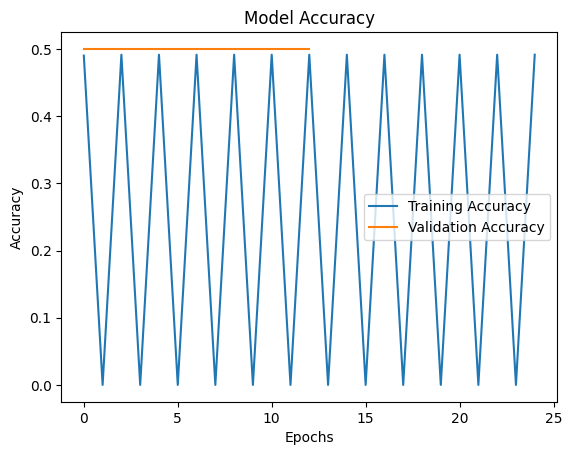

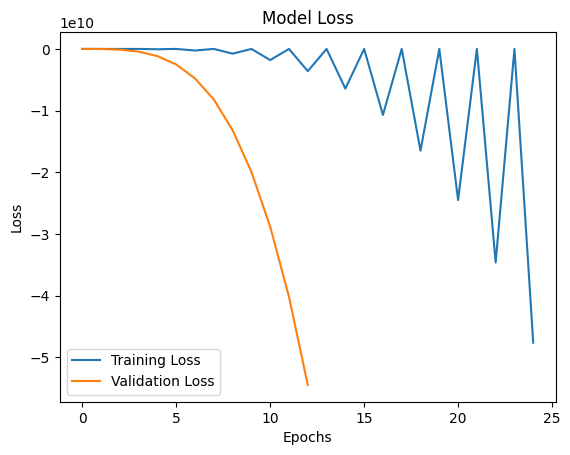

In [87]:
# Define the custom dataset class
class CustomImageDataset(tf.keras.utils.Sequence):
    def __init__(self, directory, target_size=(64, 64), batch_size=32, class_mode='binary', **kwargs):
        super().__init__(**kwargs)  # Ensure compatibility with TensorFlow's data adapters
        self.directory = directory
        self.target_size = target_size
        self.batch_size = batch_size
        self.class_mode = class_mode
        self.image_paths = []
        self.labels = []

        # Load image paths and labels
        for class_name in os.listdir(directory):
            class_path = os.path.join(directory, class_name)
            if os.path.isdir(class_path):
                for image_file in os.listdir(class_path):
                    self.image_paths.append(os.path.join(class_path, image_file))
                    self.labels.append(0 if class_name.lower() == 'cats' else 1)

    def __len__(self):

        return len(self.image_paths) // self.batch_size

    def __getitem__(self, idx):
        # Generate one batch of data
        batch_image_paths = self.image_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_labels = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]

        images = []
        for img_path in batch_image_paths:
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=self.target_size)
            img = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
            images.append(img)

        return tf.convert_to_tensor(images), tf.convert_to_tensor(batch_labels)

# Define paths to datasets
train_dir = 'dataset/training_set' 
test_dir = 'dataset/test_set'      

# Create datasets
batch_size = 32
training_set = CustomImageDataset(train_dir, target_size=(64, 64), batch_size=batch_size)
test_set = CustomImageDataset(test_dir, target_size=(64, 64), batch_size=batch_size)

# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(
    training_set,
    validation_data=test_set,
    epochs=25
)


# Save the picture in keras form
model.save('cat_dog_classifier.keras')



# Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Part 4 - Making a single prediction

In [90]:
# Function for making a single prediction
def predict_single_image(img_path, model):
    """
    Predicts whether the image is of a dog or a cat.

    Parameters:
        img_path (str): Path to the image to be predicted.
        model (tensorflow.keras.Model): The trained CNN model.

    Returns:
        str: 'Dog' or 'Cat' based on the prediction.
    """
    # Load the image with the target size of 64x64 (same as training)
    test_image = image.load_img(img_path, target_size=(64, 64))
    
    # Convert the image to an array
    test_image = image.img_to_array(test_image)

    # Expand dimensions to add a batch dimension (required for prediction)
    test_image = np.expand_dims(test_image, axis=0)
    
    # Normalize the pixel values (same preprocessing as training)
    test_image = test_image / 255.0
    
    # Perform prediction
    result = model.predict(test_image)
    
    # Condition for prediction
    return "Dog" if result[0][0] > 0.5 else "Cat"

In [98]:
# Example usage of the function
model = tf.keras.models.load_model('cat_dog_classifier.keras') 

image_path = 'dataset/single_prediction/cat_or_dog_2.jpg'
prediction = predict_single_image(image_path, model)
print(f"The predicted class is: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
The predicted class is: Cat


https://github.com/Kunalptl93/Machine_Learning.git

https://medium.com/@p.kunal7997/from-pixels-to-predictions-building-a-cnn-for-image-classification-f4c190ce061f